Import pandas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

reading csv file 

In [19]:

df = pd.read_csv('Energygels.csv', encoding='latin1')

Define categories with their associated keywords

In [20]:
flavor_categories = {
    'Citrus': ['lemon', 'lime', 'orange','citrus','shikuwasa','grapefruit','ao mikan'],
    'Berry': ['strawberry', 'raspberry', 'blueberry','blackcurrant','cherry','cassis','berry','strawberries','blueberries','berries'],
    'Tropical': ['mango', 'pineapple', 'tropical'],
    'Chocolate & Coffee': ['chocolate', 'mocha', 'coffee','cocoa','latte','espresso','cappucino','cold brew','machhiato'],
    'Nutty': ['peanut', 'hazelnut', 'almond','cashew'],
    'Fruit': ['apple','muscat','peach','rhubarb','grape','forest fruits','banana','fruit','green plum','watermelon','ume','kiwi','acai','pomegranate'],
    'Unflavoured': ['naked','unflavoured','neutral','nude','gel','original'],
    'Dessert': ['banoffee','tutti fruitti','birthday','campfire','vanilla','caramel','maple syrup','red bean', 'honey','cacao'],
    'Beverage-Inspired': ['cola','mojito','ramune','pear cider'],
}

In [21]:
flavor_categories_combined = {
    'Fruit': ['lemon', 'lime', 'orange','citrus','shikuwasa','grapefruit','ao mikan','strawberry', 'raspberry', 'blueberry','blackcurrant','cherry','cassis','berry','strawberries','blueberries','berries','mango', 'pineapple', 'tropical'],
    'Chocolate & Coffee': ['chocolate', 'mocha', 'coffee','cocoa','latte','espresso','cappucino','cold brew','machhiato'],
    'Nutty': ['peanut', 'hazelnut', 'almond','cashew'],
    'Fruit': ['apple','muscat','peach','rhubarb','grape','forest fruits','banana','fruit','green plum','watermelon','ume','kiwi','acai','pomegranate'],
    'Unflavoured': ['naked','unflavoured','neutral','nude','gel','original'],
    'Dessert': ['banoffee','tutti fruitti','birthday','campfire','vanilla','caramel','maple syrup'],
    'Beverage-Inspired': ['cola','mojito','ramune','pear cider'],
}

In [22]:
def categorize_flavor(flavor_name):
    if pd.isna(flavor_name):  # Check for NaN values
        return 'Unknown'  # Or any category you prefer for NaN values
    flavor_name = flavor_name.lower()  # Proceed with lowercasing
    for category, keywords in flavor_categories.items():
        if any(keyword in flavor_name for keyword in keywords):
            return category
    return 'Other'

df['Brand'] = df['Brand'].str.strip()    

Apply the function to the DataFrame

In [23]:
df['Flavor Category'] = df['Flavours'].apply(categorize_flavor)
df.dropna(subset=['Flavours'],inplace=True)
nan_values = df[df['Flavours'].isna()]
carb_counts = df['Type of Carbohydrates'].value_counts()
print(carb_counts)



Type of Carbohydrates
Maltodextrin, Fructose                            102
Maltodextrin                                       38
Glucose, Fructose                                  29
Glucose, Maltodextrin                              11
Fructose, Glucose                                  10
Maltodextrin, Glucose, Fructose                     7
Sucrose, Glucose, Fructose                          7
Glucose, Fructose                                   5
Glucose, Fructose, Sucrose                          5
Maltodextrin, Sucrose, Fructose                     4
LIVSTEADYª corn starch (glucose)                    3
Fructose, Maltodextrin, Glucose                     2
Maltodextrin, Glucose                               2
Maltodextrin, Fructose, Glucose                     2
Palatinose, Maltodextrin                            2
Glucose, Maltodextrin, Sucrose                      2
Maltodextrin, Isomaltulose                          2
Glucose, Sucrose                                    1
Glucos

In [24]:
category_counts = df['Flavor Category'].value_counts()
#print(category_counts_two)
print(df.loc[df['Brand'] == 'Muir Energy'])

           Brand                          Name  \
140  Muir Energy  Muir Energy Fast Burning Gel   
141  Muir Energy  Muir Energy Fast Burning Gel   
142  Muir Energy  Muir Energy Fast Burning Gel   
143  Muir Energy  Muir Energy Slow Burning Gel   
144  Muir Energy  Muir Energy Slow Burning Gel   
145  Muir Energy  Muir Energy Slow Burning Gel   
146  Muir Energy  Muir Energy Slow Burning Gel   
147  Muir Energy  Muir Energy Slow Burning Gel   
148  Muir Energy  Muir Energy Fast Burning Gel   
149  Muir Energy  Muir Energy Fast Burning Gel   

                                          Flavours Country  Calories  \
140   Red Raspberry Mate + Caffeine, Fast burning      USA     110.0   
141                   Red Raspberry, fast burning      NaN     110.0   
142                      Strawberry, Fast burning      NaN     100.0   
143                    Cashew Lemon, Slow burning      NaN     145.0   
144    Cashew Lemon Mate + Caffeine, Slow burning      NaN     150.0   
145    Cacao Almo

In [25]:
brands = df['Brand'].value_counts()
print(brands)

Brand
Gu                              31
High5                           15
PowerBar                        14
Santa Madre                     13
Torq                            13
Science in Sport                12
Huma                            12
Hammer Nutrition                12
6d sports                       11
Muir Energy                     10
OTE Sports                       8
Mag-On                           8
Koda                             6
boom!                            6
veloforte                        5
Styrkr                           5
Untapped                         5
Fixx                             5
Honey Stinger                    4
Winzone                          4
AMACX Turbo Gel                  3
Bare Performance Nutrition       3
Ucan                             3
Chargel                          3
Enervit                          3
Maxim                            3
Precision Fuel and Hydration     3
Maurten                          3
Amino Saurus  

In [26]:
#Calculate the average for each brand
averages = df.groupby('Brand')['Total Carbohydrates'].agg(['min','max','mean'])
print(averages)

                                min    max       mean
Brand                                                
6d sports                     20.00  45.00  30.454545
AMACX Turbo Gel               40.00  40.00  40.000000
Amino Saurus                  22.00  25.00  23.500000
Bare Performance Nutrition    24.00  24.00  24.000000
Carbs Fuel                    50.00  50.00  50.000000
Carno Power                   26.92  26.92  26.920000
Chargel                       45.00  45.00  45.000000
Endurance Tap                 25.00  25.00  25.000000
Enervit                       40.00  40.00  40.000000
First Endurance               28.00  28.00  28.000000
Fixx                          29.30  29.30  29.300000
Gu                            19.00  23.00  21.935484
Hammer Nutrition              18.00  22.00  21.166667
High5                         23.00  23.00  23.000000
Honey Stinger                 24.00  24.00  24.000000
Huma                          21.00  25.00  22.083333
Imuraya                     

In [27]:
#sort out the energy gels with the highest sodium 
df_sodium = df.sort_values(by='Sodium',ascending=False)
print(df_sodium.head(10))

        Brand                     Name                         Flavours  \
231    Victus                  Victus                            Lemon    
114      Huma               Huma Plus   Strawberry Lemonade + Caffeine    
116      Huma               Huma Plus          Berries and Pomegranate    
115      Huma               Huma Plus       Lemon and Limes + Caffeine    
117      Huma               Huma Plus                Blackberry Banana    
34       Fixx               Gel X Pro                Coldbrew Espresso    
35       Fixx               Gel X Pro                      Lemon Sorbet   
36       Fixx               Gel X Pro                       Pear Cider    
166  PowerBar  Powerbar Powergel Hydro                           Orange   
158  PowerBar                 PowerBar                  Tropical Fruit    

    Country  Calories  Total Carbohydrates             Type of Carbohydrates  \
231     NaN     180.0                 45.0  Maltodextrin, Fructose, Glucose    
114     NaN   

In [28]:
carbs = df['Carb ratio'].value_counts()
print(carbs)
    


Carb ratio
2:1      54
1:1      23
1:0.8    22
3:1      16
1:0.5     7
9:1       6
Name: count, dtype: int64


In [29]:
average_df = df.groupby('Name')[['Calories', 'Total Carbohydrates','Sodium','Caffeine']].mean().reset_index().dropna()
print(average_df)

                                  Name  Calories  Total Carbohydrates  Sodium  \
0      6d Sports Nutrition Energy Gel      120.0               30.000   200.0   
1        6d Sports Nutrition Iso Gels       81.0               20.000     0.0   
2       6d Sports Nutrition Sport Gel      120.0               30.000   200.0   
3       6d Sports Nutrition Ultra Gel      180.0               45.000   200.0   
4                      AMACX Turbo Gel     160.0               40.000   200.0   
..                                 ...       ...                  ...     ...   
59  Untapped Maple Syrup Athletic Fuel     100.0               26.000    47.2   
60                 Veloforte Desto Gel      89.0               22.000   120.0   
61                             Victus      180.0               45.000   340.0   
62                     Weider in Jelly     180.0               45.000     0.0   
63                  Winzone Energy Gel     115.0               28.975     0.0   

     Caffeine  
0   75.0000

In [30]:
flavour_cat = df.groupby('Flavor Category')[['Calories', 'Total Carbohydrates','Sodium','Caffeine']].mean().reset_index().dropna()
print(flavour_cat)

      Flavor Category    Calories  Total Carbohydrates      Sodium   Caffeine
0               Berry  108.678571            25.903571   80.932143  14.928571
1   Beverage-Inspired  113.333333            27.685000  119.833333  62.083333
2  Chocolate & Coffee  101.095238            23.861905   87.952381  46.619048
3              Citrus  120.145161            28.540323   80.845161  14.435484
4             Dessert  104.466667            24.833333   64.800000  14.266667
5               Fruit  116.606061            28.918182   57.460606  16.545455
6               Nutty  124.666667            16.666667   91.833333  15.000000
7            Tropical  102.125000            24.306250   61.181250  10.937500
8         Unflavoured  151.250000            37.000000   46.375000  35.625000


In [31]:
print(category_counts)

Flavor Category
Citrus                62
Berry                 56
Fruit                 33
Chocolate & Coffee    21
Tropical              16
Unflavoured           16
Dessert               15
Beverage-Inspired     12
Nutty                  6
Name: count, dtype: int64


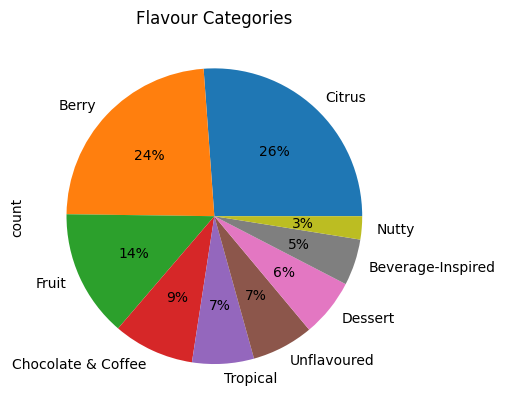

In [32]:
category_counts.plot(kind='pie', title = 'Flavour Categories',autopct='%1.0f%%')
plt.show()